In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data
X = pd.read_csv('./data/train.csv', index_col=None)
X_test_full = pd.read_csv('./data/test.csv', index_col=None)

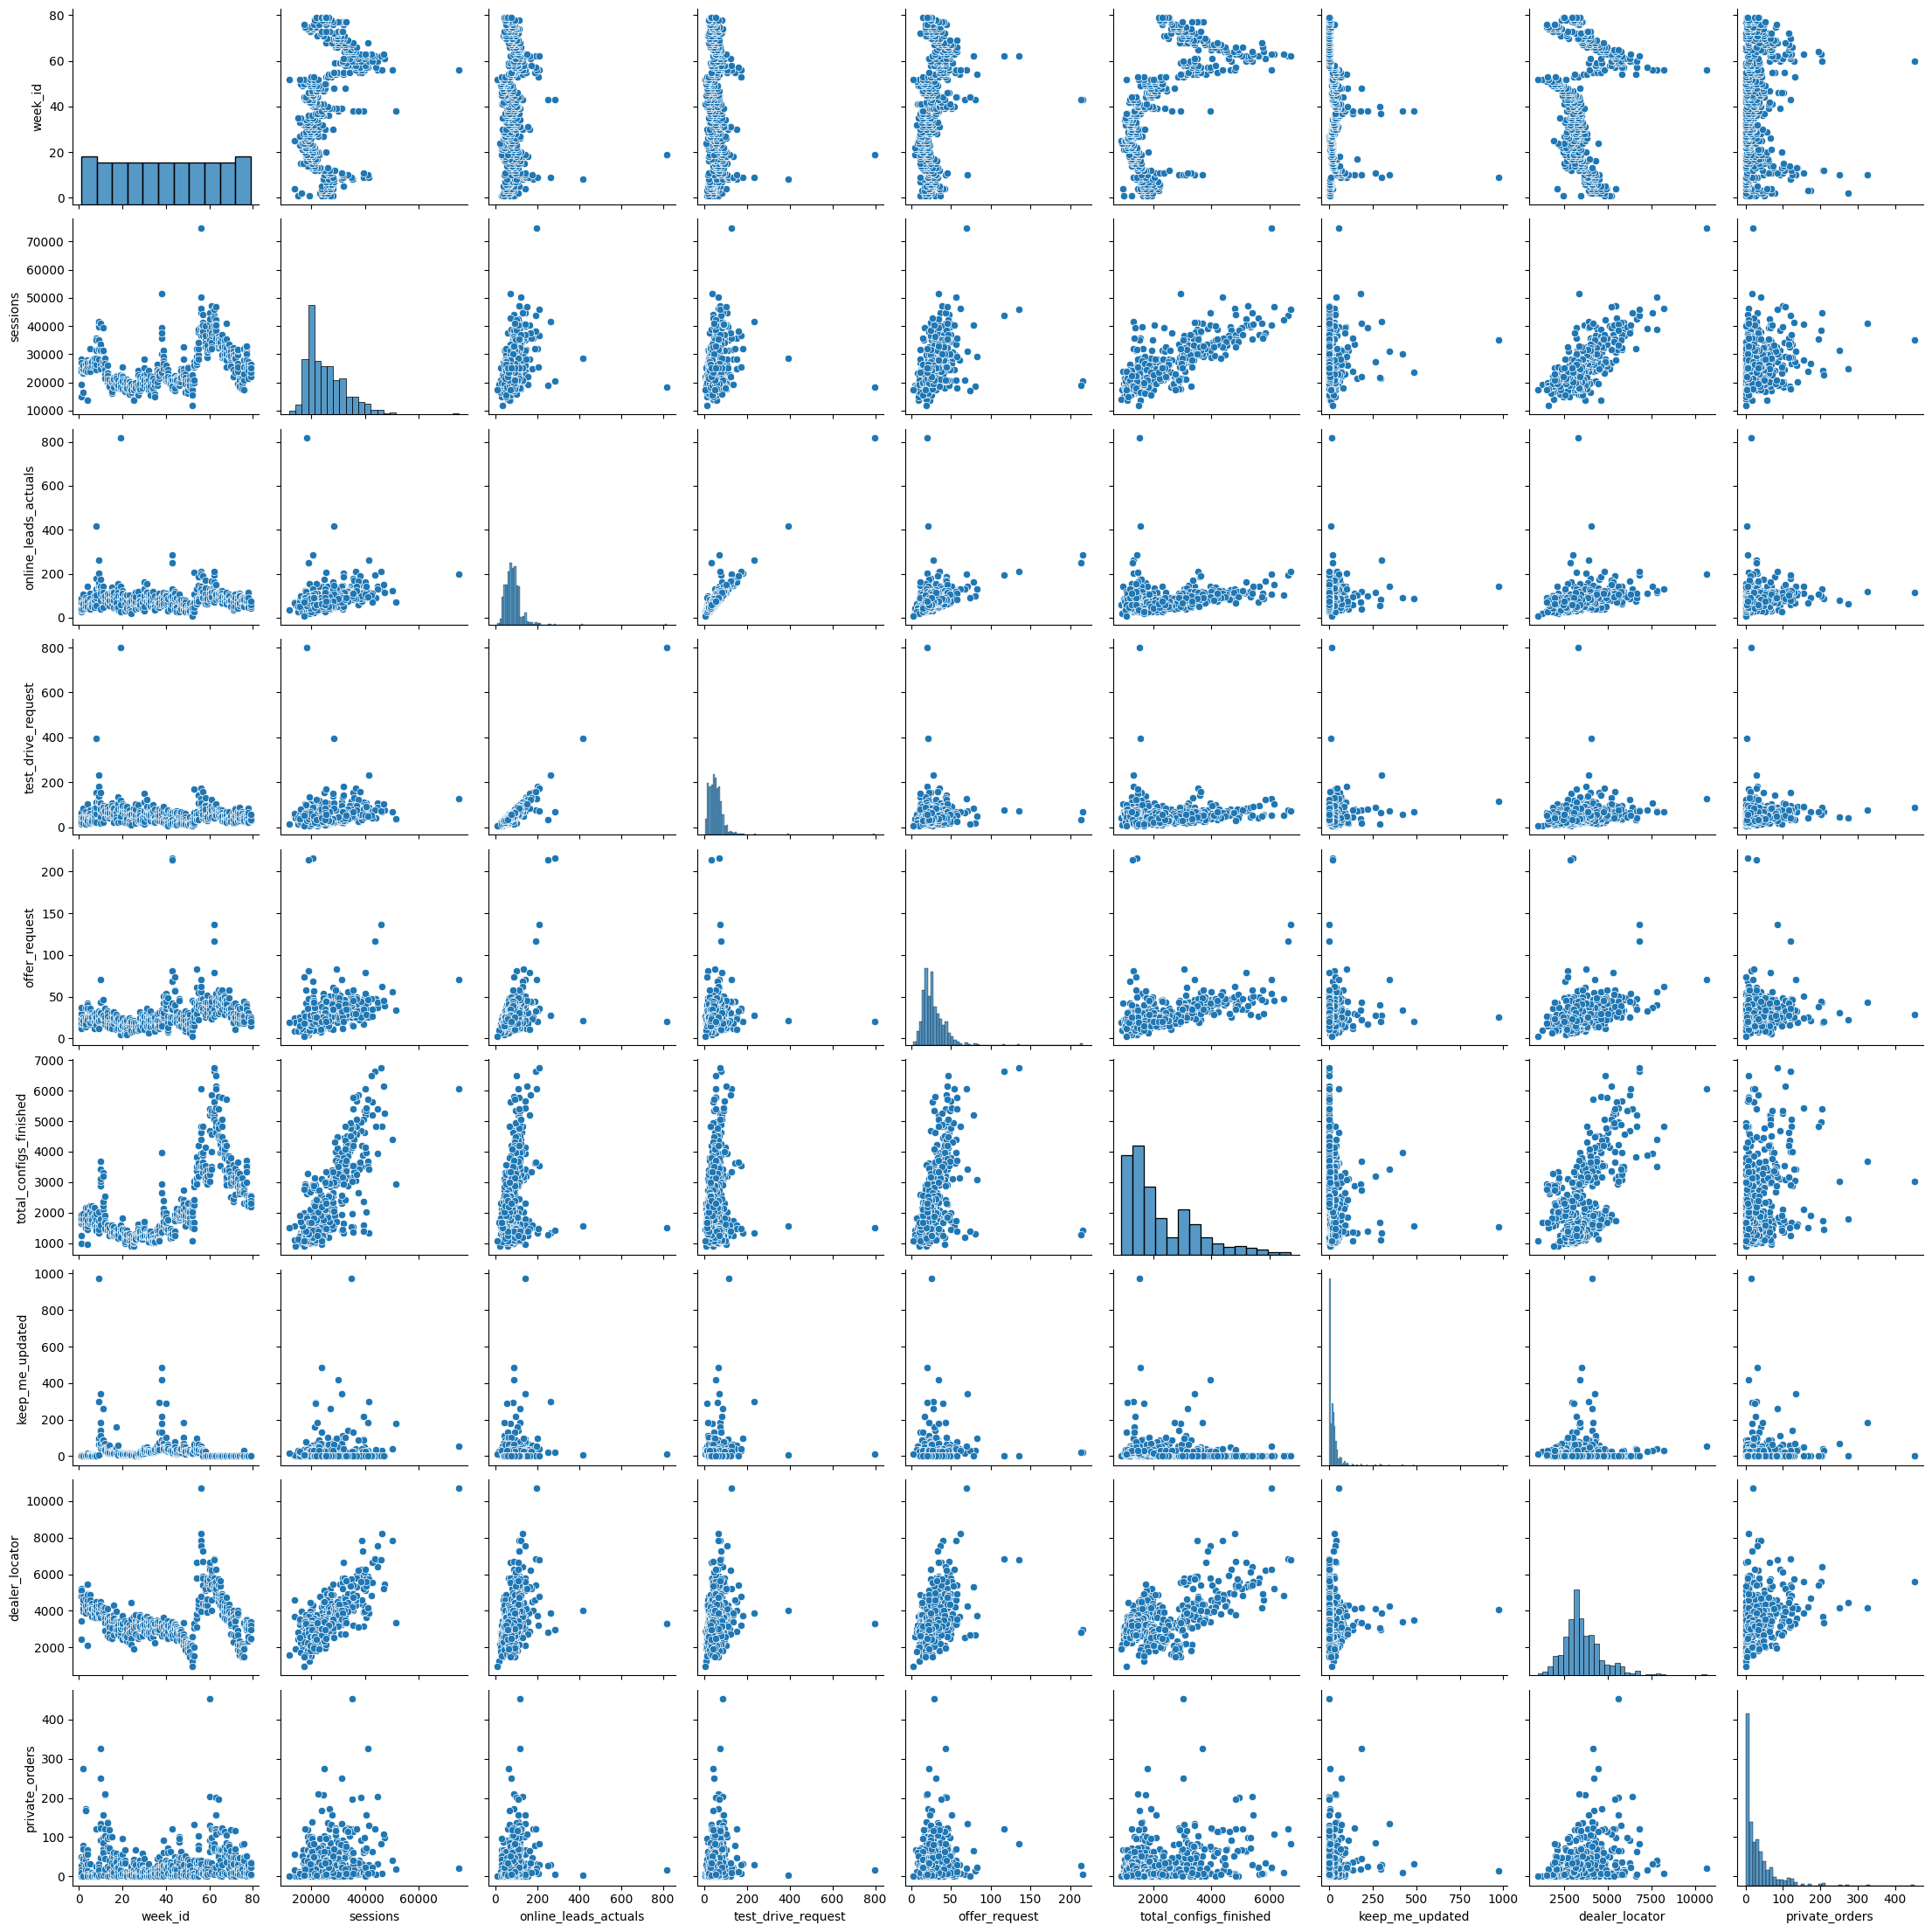

In [3]:
sns.pairplot(X)
plt.show()

In [4]:
# Separate target from predictors
y = X.private_orders            
X.drop(['private_orders', 'week_id', 'date'], axis=1, inplace=True)
X_test_full.drop(['week_id', 'date'], axis=1, inplace=True)

In [5]:
# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [6]:
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [7]:
# Improve model

# Define the model
# my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model_2 = XGBRegressor(n_estimators=100, early_stopping_rounds=2)
# my_model_2 = XGBRegressor(n_estimators=1000, early_stopping_rounds=5, learning_rate=0.05)

# Fit the model
my_model_2.fit(X_train, y_train, 
             eval_set=[(X_valid, y_valid)],
             verbose=False) 

# Get predictions
predictions_2 = my_model_2.predict(X_valid) 

# Calculate MAE
mae_2 = mean_absolute_error(y_valid, predictions_2) 
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 28.783207120122135


In [9]:
X_test.head()

sessions  online_leads_actuals  test_drive_request  offer_request  \
0     24420                    61                  38             23   
1     28615                    49                  23             26   
2     33702                    85                  52             33   
3     28600                    89                  46             43   
4     28625                    76                  41             35   

   total_configs_finished  keep_me_updated  dealer_locator  
0                    2396                0            2464  
1                    2713                0            3532  
2                    3167                0            3752  
3                    2792                0            3112  
4                    2888                0            3383

In [14]:
X_test.head()

sessions  online_leads_actuals  test_drive_request  offer_request  \
0     24420                    61                  38             23   
1     28615                    49                  23             26   
2     33702                    85                  52             33   
3     28600                    89                  46             43   
4     28625                    76                  41             35   

   total_configs_finished  keep_me_updated  dealer_locator  
0                    2396                0            2464  
1                    2713                0            3532  
2                    3167                0            3752  
3                    2792                0            3112  
4                    2888                0            3383

In [8]:
# Predict on the dataset X_test
new_data_predictions = my_model_2.predict(X_test) 

In [12]:
# Add predictions to the X test df and print to csv
X_test_full['predicted_orders'] = new_data_predictions
X_test_full.to_csv("./data/predicted.csv")

X_test_full.head()

sessions  online_leads_actuals  test_drive_request  offer_request  \
0     24420                    61                  38             23   
1     28615                    49                  23             26   
2     33702                    85                  52             33   
3     28600                    89                  46             43   
4     28625                    76                  41             35   

   total_configs_finished  keep_me_updated  dealer_locator  predicted_orders  
0                    2396                0            2464         18.239044  
1                    2713                0            3532         13.328726  
2                    3167                0            3752         35.826565  
3                    2792                0            3112         61.361473  
4                    2888                0            3383         35.826565

In [13]:
my_model_2.save_model('final_model.json')